In [1]:
import pandas as pd

In [41]:
import numpy as np

In [150]:
data1=pd.read_csv('C:/Users/K Mohan/Downloads/database.csv')

In [151]:
data1

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [152]:
data1['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [153]:
index_unwanted= data1[(data1['Type']=='Nuclear Explosion') | (data1['Type']=='Explosion') | (data1['Type']=='Rock Burst')].index

In [154]:
index_unwanted

Int64Index([  565,   897,  1129,  1380,  1532,  2614,  2723,  2797,  2859,
             2876,
            ...
            10234, 10488, 10907, 11641, 11963, 12142, 12450, 12613, 13054,
            19898],
           dtype='int64', length=180)

In [155]:


data=data1.drop(index_unwanted).reset_index(drop=True)

In [156]:
data=data.drop('Type',axis=1)

In [157]:
data

,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [158]:
data['Depth Error'].isna().sum()

18783

In [159]:
data['Depth Error'].describe()

count    4449.000000
mean        4.921323
std         4.681354
min         0.000000
25%         1.800000
50%         3.500000
75%         6.200000
max        91.295000
Name: Depth Error, dtype: float64

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Depth Error', ylabel='Density'>

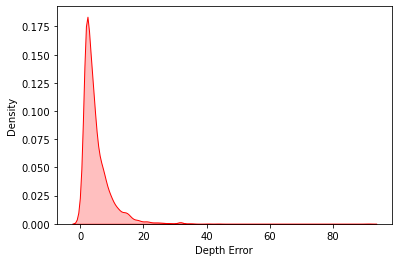

In [161]:
sns.kdeplot(data['Depth Error'], color='r', shade=True)

In [162]:
data.drop('Depth Error',axis=1)

,Date,Time,Latitude,Longitude,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [163]:
data['Depth Seismic Stations'].describe()

count    7084.000000
mean      275.796302
std       161.961894
min         0.000000
25%       147.000000
50%       255.000000
75%       384.000000
max       934.000000
Name: Depth Seismic Stations, dtype: float64

In [164]:
data['ID'].value_counts()
data.drop('ID',axis=1)

,Date,Time,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN,NN,NN,Reviewed
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN,NN,NN,Reviewed
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US,US,US,Reviewed
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US,US,US,Reviewed


In [165]:
data['Source'].value_counts()

US           20462
ISCGEM        2460
ISCGEMSUP      120
GCMT            55
NC              51
CI              49
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

In [166]:
data['Location Source'].value_counts()

US        20182
ISCGEM     2581
GCMT         56
NC           54
CI           49
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
ROM           7
AEI           7
TEH           7
H             7
UW            6
CASC          4
NN            4
US_WEL        4
ATLAS         3
THR           3
THE           3
JMA           3
RSPR          3
TUL           2
B             2
G             2
MDD           2
TAP           1
BEO           1
SE            1
UCR           1
LIM           1
CSEM          1
SJA           1
CAR           1
BRK           1
U             1
AG            1
OTT           1
SLC           1
BOU           1
PR            1
Name: Location Source, dtype: int64

In [167]:
data['Magnitude Source'].value_counts()

US          10290
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             49
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
1000            3
US_GCMT         3
ATLAS           3
BRK             2
PGC             2
1023            1
1009            1
SE              1
US_PGC          1
1020            1
PR              1
Name: Magnitude Source, dtype: int64

In [168]:
data['Status'].value_counts()

Reviewed     20593
Automatic     2639
Name: Status, dtype: int64

In [169]:
data['Azimuthal Gap'].describe()

count    7286.000000
mean       43.807400
std        30.947508
min         0.000000
25%        24.100000
50%        36.000000
75%        53.775000
max       360.000000
Name: Azimuthal Gap, dtype: float64

<AxesSubplot:xlabel='Azimuthal Gap', ylabel='Density'>

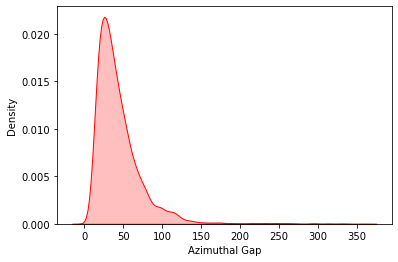

In [170]:
sns.kdeplot(data['Azimuthal Gap'], color='r', shade=True)

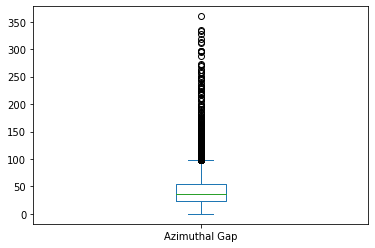

In [171]:
data['Azimuthal Gap'].plot(kind='box');

In [172]:
mean=data['Azimuthal Gap'] .mean(skipna = True)
data['Azimuthal Gap'] = np.where(data['Azimuthal Gap'] >150, mean,data['Azimuthal Gap'])

<AxesSubplot:xlabel='Azimuthal Gap', ylabel='Density'>

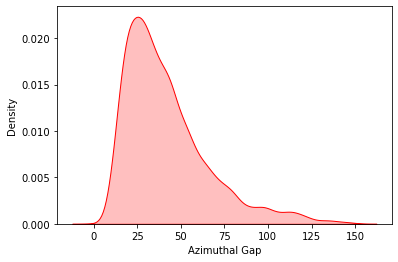

In [173]:
sns.kdeplot(data['Azimuthal Gap'], color='r', shade=True)

In [177]:
data['Azimuthal Gap']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
23227    42.47
23228    48.58
23229    91.00
23230    26.00
23231    97.00
Name: Azimuthal Gap, Length: 23232, dtype: float64

In [178]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum())

Date
0
Time
0
Latitude
0
Longitude
0
Depth
0
Depth Error
18783
Depth Seismic Stations
16148
Magnitude
0
Magnitude Type
3
Magnitude Error
22917
Magnitude Seismic Stations
20772
Azimuthal Gap
15946
Horizontal Distance
21637
Horizontal Error
22088
Root Mean Square
5985
ID
0
Source
0
Location Source
0
Magnitude Source
0
Status
0


In [179]:
data2=data.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Horizontal Distance','Horizontal Error','Azimuthal Gap','ID','Source','Location Source','Magnitude Source','Status'],axis=1)

In [180]:
data2

,Date,Time,Latitude,Longitude,Depth,Magnitude,Magnitude Type,Root Mean Square
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,6.0,MW,NaN
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,5.8,MW,NaN
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,6.2,MW,NaN
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,5.8,MW,NaN
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,5.8,MW,NaN
...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,ML,0.1898
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,ML,0.2187
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,MWW,1.5200
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,MWW,1.4300


In [181]:
data2.corr()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
Latitude,1.000000,0.202677,-0.076290,0.034615,-0.213346
Longitude,0.202677,1.000000,-0.086624,0.037433,-0.028343
Depth,-0.076290,-0.086624,1.000000,0.023222,-0.137930
Magnitude,0.034615,0.037433,0.023222,1.000000,0.077234
Root Mean Square,-0.213346,-0.028343,-0.137930,0.077234,1.000000


In [182]:
mean_value=data2['Root Mean Square'].mean()
data2['Root Mean Square']=data2['Root Mean Square'].fillna(value=mean_value)

In [183]:
data2['Root Mean Square'].isna().sum()

0

In [184]:
data2['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [185]:

data2['Magnitude Type']=data2['Magnitude Type'].fillna(value='MW')

In [186]:
data2['Magnitude Type'].isna().sum()

0

In [187]:
data3 = pd.get_dummies(data2, columns = ['Magnitude Type'])

In [188]:
data3

,Date,Time,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,6.0,1.023518,0,0,0,0,0,1,0,0,0,0
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,6.2,1.023518,0,0,0,0,0,1,0,0,0,0
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,0.189800,0,0,0,1,0,0,0,0,0,0
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,0.218700,0,0,0,1,0,0,0,0,0,0
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,1.520000,0,0,0,0,0,0,0,0,0,1
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,1.430000,0,0,0,0,0,0,0,0,0,1


In [189]:
data3.isna().sum()

Date                  0
Time                  0
Latitude              0
Longitude             0
Depth                 0
Magnitude             0
Root Mean Square      0
Magnitude Type_MB     0
Magnitude Type_MD     0
Magnitude Type_MH     0
Magnitude Type_ML     0
Magnitude Type_MS     0
Magnitude Type_MW     0
Magnitude Type_MWB    0
Magnitude Type_MWC    0
Magnitude Type_MWR    0
Magnitude Type_MWW    0
dtype: int64

In [195]:
# import datetime
# import time

# timestamp = []
# for d, t in zip(data3['Date'], data3['Time']):
#     try:
#         ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
#         timestamp.append(time.mktime(ts.timetuple()))
#     except ValueError:
#         # print('ValueError')
#         timestamp.append('ValueError')
# timeStamp = pd.Series(timestamp)
# data3['Timestamp'] = timeStamp.values
# final_data = data.drop(['Date', 'Time'], axis=1)
# final_data = final_data[final_data.Timestamp != 'ValueError']
# final_data.head()

In [191]:
data3

,Date,Time,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,6.0,1.023518,0,0,0,0,0,1,0,0,0,0
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,6.2,1.023518,0,0,0,0,0,1,0,0,0,0
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,0.189800,0,0,0,1,0,0,0,0,0,0
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,0.218700,0,0,0,1,0,0,0,0,0,0
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,1.520000,0,0,0,0,0,0,0,0,0,1
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,1.430000,0,0,0,0,0,0,0,0,0,1


In [197]:
data3['time']=pd.to_datetime(data3.Date.astype(str) + ' ' +data3.Time.astype(str))

In [200]:
df_unix_sec = pd.to_datetime(data3['time']).astype(int)/ 10**9

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [int32]

In [204]:
data3['timestamp']= data3['time'].apply(lambda x:x.value)

In [206]:
data3

,Date,Time,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,time,timestamp
0,01-02-1965,13:44:18,19.2460,145.6160,131.60,6.0,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-02 13:44:18,-157630542000000000
1,01-04-1965,11:29:49,1.8630,127.3520,80.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-04 11:29:49,-157465811000000000
2,01-05-1965,18:05:58,-20.5790,-173.9720,20.00,6.2,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-05 18:05:58,-157355642000000000
3,01-08-1965,18:49:43,-59.0760,-23.5570,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-08 18:49:43,-157093817000000000
4,01-09-1965,13:32:50,11.9380,126.4270,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-09 13:32:50,-157026430000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,0.189800,0,0,0,1,0,0,0,0,0,0,2016-12-28 08:22:12,1482913332000000000
23228,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,0.218700,0,0,0,1,0,0,0,0,0,0,2016-12-28 09:13:47,1482916427000000000
23229,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,1.520000,0,0,0,0,0,0,0,0,0,1,2016-12-28 12:38:51,1482928731000000000
23230,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,1.430000,0,0,0,0,0,0,0,0,0,1,2016-12-29 22:30:19,1483050619000000000


In [212]:
data3=data3.drop(['Date','Time'],axis=1)

KeyError: "['Date', 'Time'] not found in axis"

In [213]:
data3

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Magnitude Type_MB,Magnitude Type_MD,Magnitude Type_MH,Magnitude Type_ML,Magnitude Type_MS,Magnitude Type_MW,Magnitude Type_MWB,Magnitude Type_MWC,Magnitude Type_MWR,Magnitude Type_MWW,time,timestamp
0,19.2460,145.6160,131.60,6.0,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-02 13:44:18,-157630542000000000
1,1.8630,127.3520,80.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-04 11:29:49,-157465811000000000
2,-20.5790,-173.9720,20.00,6.2,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-05 18:05:58,-157355642000000000
3,-59.0760,-23.5570,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-08 18:49:43,-157093817000000000
4,11.9380,126.4270,15.00,5.8,1.023518,0,0,0,0,0,1,0,0,0,0,1965-01-09 13:32:50,-157026430000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23227,38.3917,-118.8941,12.30,5.6,0.189800,0,0,0,1,0,0,0,0,0,0,2016-12-28 08:22:12,1482913332000000000
23228,38.3777,-118.8957,8.80,5.5,0.218700,0,0,0,1,0,0,0,0,0,0,2016-12-28 09:13:47,1482916427000000000
23229,36.9179,140.4262,10.00,5.9,1.520000,0,0,0,0,0,0,0,0,0,1,2016-12-28 12:38:51,1482928731000000000
23230,-9.0283,118.6639,79.00,6.3,1.430000,0,0,0,0,0,0,0,0,0,1,2016-12-29 22:30:19,1483050619000000000


In [214]:
y = data3[['Magnitude', 'Depth']]

In [215]:
X=data3.drop(['Magnitude', 'Depth','time'],axis=1)

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18585, 14) (4647, 14) (18585, 2) (4647, 14)


In [222]:
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# fit model
model.fit(X_train, y_train)
# make a prediction


LinearRegression()

In [225]:
y_pred=model.predict(X_test)

In [224]:
from sklearn.metrics import r2_score

In [226]:
r2_score(y_test,y_pred)

-0.026335763075710727

In [228]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

-0.0269546501275717

# RandomForestRegressor

In [229]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [232]:
y_pred_rf=regressor.predict(X_test)
y_pred_rf

array([[  5.658,  41.606],
       [  5.815,  36.912],
       [  6.309,  33.504],
       ...,
       [  5.711,  39.075],
       [  6.553, 374.529],
       [  5.982,  10.88 ]])

In [238]:
from sklearn.metrics import mean_squared_error


In [233]:
r2_score(y_test,y_pred_rf)

0.4317510599394811

In [236]:
Adj_r2_rb = 1 - (1-r2_score(y_test, y_pred_rf)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2_rb

0.431408402181767

# KNN

In [240]:
from sklearn import neighbors
from math import sqrt

In [242]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 114.51530239705465
RMSE value for k=  2 is: 101.21381239449917
RMSE value for k=  3 is: 96.08739857302804
RMSE value for k=  4 is: 93.4800979748706
RMSE value for k=  5 is: 91.81059063861301
RMSE value for k=  6 is: 91.02814512108112
RMSE value for k=  7 is: 90.06539837370542
RMSE value for k=  8 is: 89.43445262236905
RMSE value for k=  9 is: 88.85157210283148
RMSE value for k=  10 is: 88.56498283514026
RMSE value for k=  11 is: 88.05626146689802
RMSE value for k=  12 is: 87.75476624524839
RMSE value for k=  13 is: 87.49424047425242
RMSE value for k=  14 is: 87.16820877797014
RMSE value for k=  15 is: 87.12719290416732
RMSE value for k=  16 is: 87.0230210089347
RMSE value for k=  17 is: 86.95215765424652
RMSE value for k=  18 is: 86.79546841284342
RMSE value for k=  19 is: 86.7927884798007
RMSE value for k=  20 is: 86.65259600994041


<AxesSubplot:>

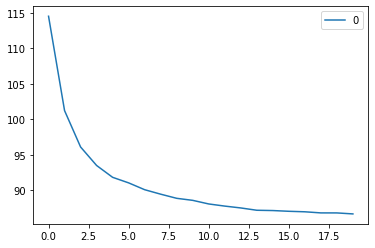

In [243]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [244]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train, y_train)  
pred=model.predict(X_test)

In [245]:
r2_score(y_test,pred)

-0.1723674153194077